# Graded Challenge 4

## Perkenalan

`Nama : Aan Nurliyanah`

`Batch : 002`

## Query

Query yang digunakan untuk mengambil dataset ini adalah :


SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.credit-card-information`


WHERE MOD(CUST_ID, 2) = 0


ORDER BY CUST_ID ASC


## Assignment Objective

Graded Challenge 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mengimplementasikan Clustering pada data yang diberikan

## Problems

Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

## Import Libraries 

Penggunaan library :

- numpy, pandas, seaborn, matplotlib : untuk perhitungan data, pengolahan data, dan visualisasi data.
- winsorizer : untuk handling outlier
- StandardScaler : untuk scaler numerical data
- OneHotEncoder : untuk encoding categorical data
- KMeans,DBSCAN,GaussianMixture,AgglomerativeClustering: model yang digunakan.
- PCA : untuk mereduksi dimensi 
- KElbowVisualizer : visualisasi elbow method 
- silhouette_score : untuk mengevalusi hasil model yang digunakan
- variance_inflation_factor : mencari nilai VIF untuk melihat multicolinarity antar kolom

In [225]:
!pip install feature_engine
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import LogNorm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from statsmodels.stats.outliers_influence import variance_inflation_factor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading and Overview

Dataset ini diambil dari Google BigQuery.

- Project ID : ftds-hacktiv8-project
- Dataset Name :phase1_ftds_002_hck
- Table Name : credit-card-information

Keterangan data :
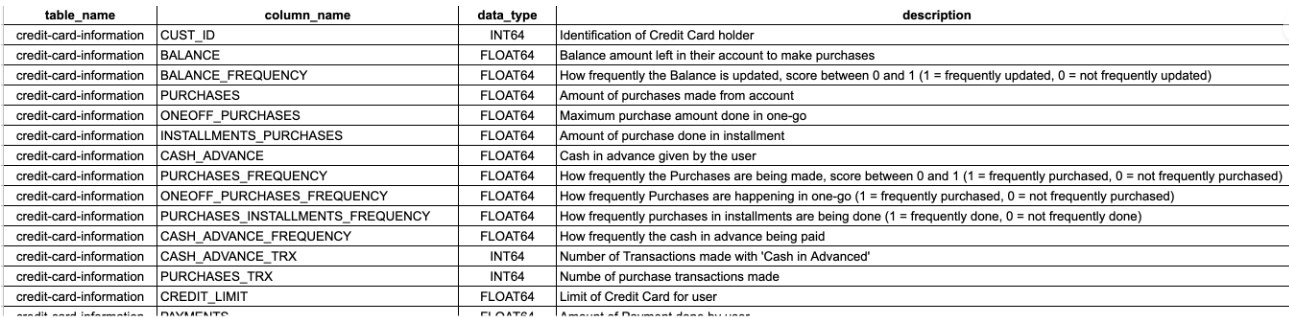

Loading data dengan menggunakan pd.read_csv dan mendefinisikan jika terdapat values seperti '?',' ','99999','N/A' akan didefinisikan sebagai nan atau missing value, juga menggunakan parameter skipinitialspace untuk skip jika ada spasi di seluruh dataframe.

In [226]:
data = pd.read_csv('h8dsft_P1G4_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'],skipinitialspace=True)

Melihat ukuran data baris dan kolom 

In [227]:
data.shape

(4475, 18)

Menampilkan data awal 

In [228]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12


Menampilkan data akhir

In [229]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,8942,83.477053,0.181818,0.00,0.0,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.50,12
4471,8944,8.404256,0.857143,0.00,0.0,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.25,7
4472,8946,4211.539631,1.000000,0.00,0.0,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.00,12
4473,8948,111.539712,1.000000,1364.86,0.0,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.20,12
4474,8950,294.280019,1.000000,19.90,19.9,0.00,75.255164,0.083333,0.083333,0.000000,0.166667,2,1,1000.0,214.638861,174.577973,0.00,12


Melihat overview dari banyaknya baris dan kolom, dan jumlah baris di setiap kolom, nama kolom beserta tipe data nya. 

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Mengecek missing value

In [231]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Mengecek duplikat data 

In [232]:
data[data.duplicated()].shape

(0, 18)

In [233]:
data.isnull().sum().any()

True

Melihat central tedency pada dataset 

In [234]:
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


Pada kolom CASH_ADVANCE_FREQUENCY terdapat anomali, karena batasnya 0 - 1 , kenapa dia punya nilai 1 lebih, jadi akan di handling, mari kita lihat isi datanya 

In [235]:
data[data['CASH_ADVANCE_FREQUENCY'] > 1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1325,2652,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
4459,8920,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6


In [236]:
for i in data:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

CUST_ID

2       1
5964    1
5976    1
5974    1
5972    1
       ..
2996    1
2998    1
3000    1
3002    1
8950    1
Name: CUST_ID, Length: 4475, dtype: int64
----------
BALANCE

0.000000       37
4613.570499     1
2021.641161     1
463.071288      1
2481.696036     1
               ..
30.186422       1
2004.816462     1
2628.010018     1
409.592245      1
294.280019      1
Name: BALANCE, Length: 4439, dtype: int64
----------
BALANCE_FREQUENCY

1.000000    3100
0.909091     199
0.818182     132
0.727273     117
0.636364     110
0.545455     104
0.363636      95
0.454545      82
0.181818      75
0.272727      70
0.000000      37
0.090909      34
0.857143      33
0.875000      31
0.900000      30
0.833333      29
0.888889      28
0.500000      19
0.666667      18
0.333333      15
0.800000      12
0.777778      12
0.571429      11
0.700000       8
0.625000       7
0.750000       7
0.714286       6
0.300000       6
0.125000       5
0.375000       5
0.555556       5
0.200000       4
0.400

In [237]:
for i in data:
    print(i)
    print()
    print(data[i].unique())
    print('-' * 10)

CUST_ID

[   2    4    6 ... 8946 8948 8950]
----------
BALANCE

[4613.570499 2583.247881 1597.911395 ... 4211.539631  111.539712
  294.280019]
----------
BALANCE_FREQUENCY

[1.       0.727273 0.545455 0.333333 0.272727 0.454545 0.181818 0.6
 0.636364 0.909091 0.2      0.363636 0.818182 0.9      0.857143 0.8
 0.888889 0.625    0.5      0.571429 0.833333 0.285714 0.142857 0.090909
 0.777778 0.7      0.125    0.875    0.       0.4      0.666667 0.3
 0.25     0.75     0.375    0.1      0.555556 0.444444 0.222222 0.714286
 0.166667 0.111111]
----------
PURCHASES

[   0.   1337.35  359.96 ... 2370.44 1364.86   19.9 ]
----------
ONEOFF_PURCHASES

[ 0.   45.65 86.   ... 34.83 47.5  19.9 ]
----------
INSTALLMENTS_PURCHASES

[   0.   1291.7   359.96 ...  190.96 2322.94 1364.86]
----------
CASH_ADVANCE

[1728.341939 2484.59465   162.919727 ...  132.266653  455.581546
   75.255164]
----------
PURCHASES_FREQUENCY

[0.       1.       0.916667 0.333333 0.666667 0.25     0.1      0.166667
 0.5      0

General overview :  
- tidak ada data duplikat 
- terdapat misisng value pada MINIMUM_PAYMENTS sebesar 158 dan di CREDIT_LIMIT sebesar 1, akan kita drop
- Pada kolom CASH_ADVANCE_FREQUENCY terdapat anomali, karena batasnya 0 - 1 , kenapa dia punya nilai 1 lebih, jadi akan di handling 
- kolom CUST_ID akna di drop 

## Data Cleaning

In [238]:
data_clean = data.copy()

Menghandling data anomali pada kolom CASH_ADVANCE_FREQUENCY dengan mengubah nya menjadi 1. karena kategori ini jenisnya hanya ada 0 dan 1.  

In [239]:
cash_frequency = data_clean[data_clean['CASH_ADVANCE_FREQUENCY'] > 1].index
data_clean['CASH_ADVANCE_FREQUENCY'].iloc[cash_frequency] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [240]:
data_clean.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134081,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.198865,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.000000,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


Drop missing value

In [241]:
data_clean.dropna(axis=0,inplace=True)

In [242]:
data_clean.isnull().sum().any()

False

In [243]:
data_clean.shape

(4316, 18)

Menghapus kolom CUST_ID karena tidak akan digunakan untuk analisis. CUST_ID hanya mempresentasikan nomor unique saja.

In [244]:
data_clean.drop(columns='CUST_ID',axis=1,inplace=True)

In [245]:
data_clean.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4613.570499,1.0,0.00,0.00,0.0,1728.341939,0.0,0.000000,0.0,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11
1,2583.247881,1.0,1337.35,45.65,1291.7,2484.594650,1.0,0.083333,1.0,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12


## Exploratory Data Analysis (EDA)

### EDA For Analysis

Melihat visualisasi pada Tenure

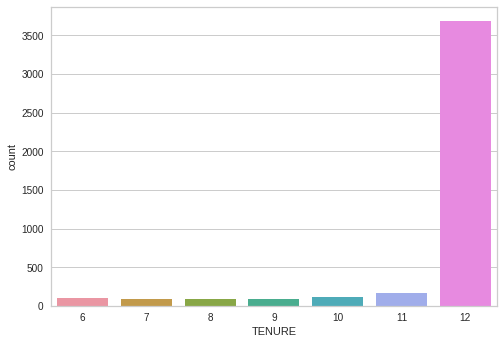

In [246]:
sns.countplot(x='TENURE',data=data_clean)
plt.show()


Dari visualisasi diatas didapatkan jumlah tenure terbanyak ada di 12 bulan. 

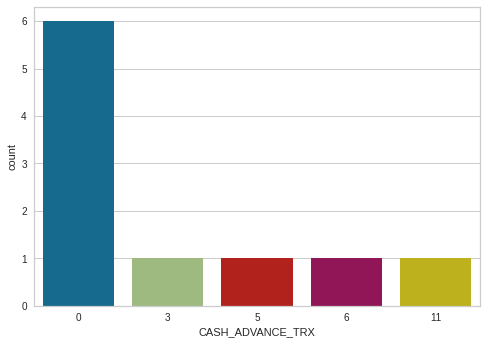

In [247]:
sns.countplot(x='CASH_ADVANCE_TRX',data=data_clean.sample(10,random_state=10))
plt.show()

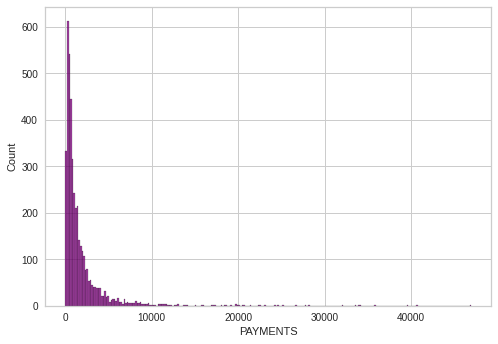

In [248]:
sns.histplot(data=data_clean,x='PAYMENTS',color="purple")

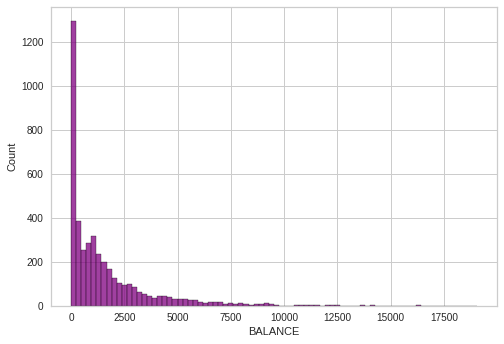

In [249]:
sns.histplot(data=data_clean,x='BALANCE',color="purple")

Dari visualisasi pada EDA didapatkan : 
- jumlah tenure terbanyak ada di 12 bulan.
- CASH_ADVANCE_TRX pada random sample terdapat nilai 0 paling banyak artinya banyak yang tidak bertransaksi 
-  PAYMENTS terlihat bahwa distribusi tidak normal dan banyak nilai 0 juga, artinya banyak yang tidak melakukan payment 
- BALANCE sama dengan Payments juga terlihat banyak yang balance nya 0 .


## Data Preprocessing

Membagi data kedalam data inference

### Inference

In [250]:
# separating inference data
df_inf = data_clean.sample(5, random_state=32)
# reseting index
df_inf.reset_index(drop=True, inplace=True)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,83.004246,1.000000,726.89,482.51,244.38,0.0,0.833333,0.583333,0.666667,0.0,0,23,3000.0,666.292539,179.204296,0.166667,12
1,525.174170,1.000000,91.23,48.90,42.33,0.0,0.333333,0.083333,0.250000,0.0,0,4,4000.0,154.939835,233.341617,0.000000,12
2,736.736738,1.000000,1171.50,1003.54,167.96,0.0,0.750000,0.750000,0.333333,0.0,0,26,4000.0,2092.544158,200.597917,0.000000,12
3,1229.397644,1.000000,11414.48,6754.38,4660.10,0.0,1.000000,0.916667,1.000000,0.0,0,176,9000.0,9686.614183,263.250811,0.916667,12
4,26.621291,0.363636,426.83,426.83,0.00,0.0,0.416667,0.416667,0.000000,0.0,0,5,6000.0,195.490843,88.384521,0.000000,12


In [251]:
# separating inferential data from dataframe
data_pro = data_clean.drop(df_inf.index)
# reseting index
data_pro.reset_index(drop=True, inplace=True)
data_pro

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,101.682988,1.000000,610.34,86.00,524.34,0.000000,1.000000,0.166667,1.000000,0.000000,0,40,1500.0,324.924223,152.877812,0.090909,12
1,966.251742,1.000000,311.45,311.45,0.00,955.959749,0.333333,0.333333,0.000000,0.083333,1,15,1500.0,277.522439,286.299328,0.000000,12
2,2306.698723,0.727273,12784.51,11246.07,1538.44,191.652876,0.666667,0.666667,0.333333,0.083333,1,68,6200.0,13705.004410,1310.291574,0.000000,12
3,2610.433432,1.000000,512.50,0.00,512.50,2771.850961,1.000000,0.000000,0.857143,0.142857,6,11,3000.0,691.600531,741.985756,0.000000,7
4,1852.646433,1.000000,2600.00,2200.00,400.00,3481.132679,0.333333,0.166667,0.083333,0.083333,8,4,6000.0,1362.425769,727.429491,0.100000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.500000,12
4307,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.250000,7
4308,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.000000,12
4309,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.200000,12


Membagi data kedalam kategori numerical dan categorical 

In [252]:
num = data_pro.drop(['TENURE'],axis=1)
cols = data_pro[['TENURE']]

Melihat nilai skew dan visualisasi distrubusi di kolom numeric.

In [253]:
num.skew()

BALANCE                              2.443500
BALANCE_FREQUENCY                   -2.081280
PURCHASES                            8.898401
ONEOFF_PURCHASES                    10.040674
INSTALLMENTS_PURCHASES               8.029280
CASH_ADVANCE                         4.718125
PURCHASES_FREQUENCY                  0.035325
ONEOFF_PURCHASES_FREQUENCY           1.492827
PURCHASES_INSTALLMENTS_FREQUENCY     0.486631
CASH_ADVANCE_FREQUENCY               1.771977
CASH_ADVANCE_TRX                     4.730579
PURCHASES_TRX                        4.428115
CREDIT_LIMIT                         1.524542
PAYMENTS                             5.984193
MINIMUM_PAYMENTS                    12.374923
PRC_FULL_PAYMENT                     1.852575
dtype: float64

In [254]:
def diagnostic_plots(num, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=num[variable])
    plt.title('Boxplot')

    plt.show()

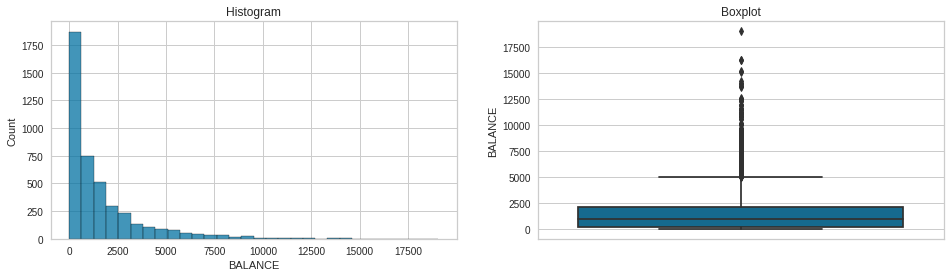

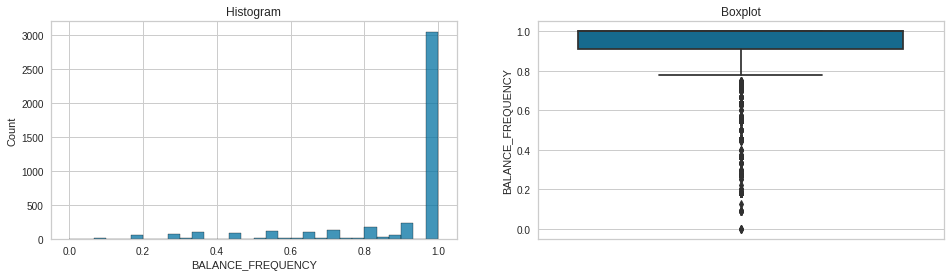

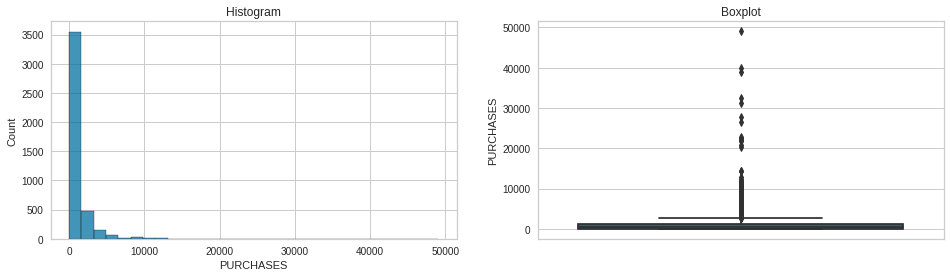

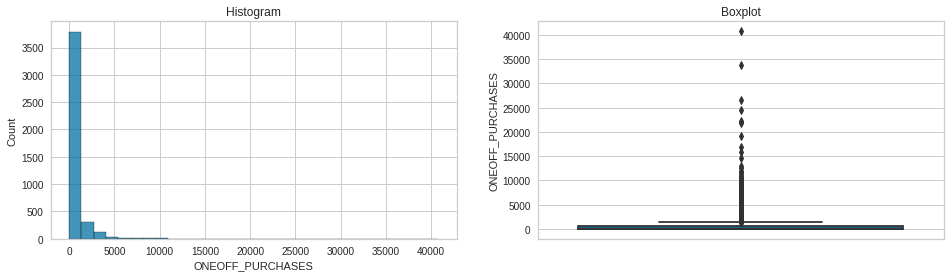

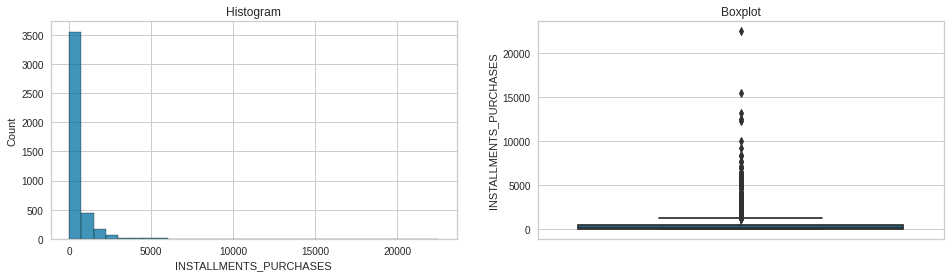

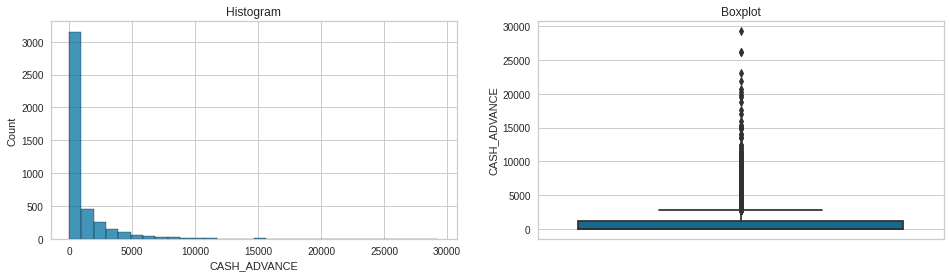

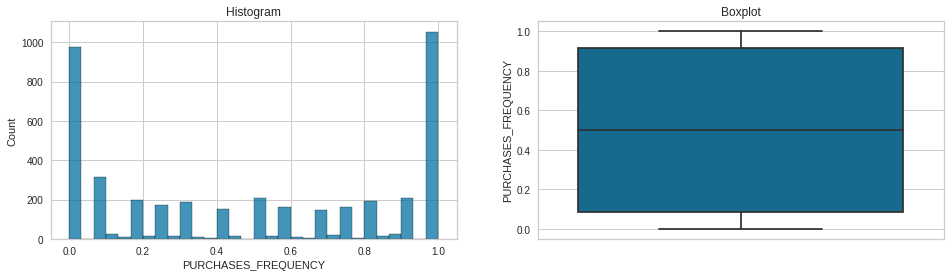

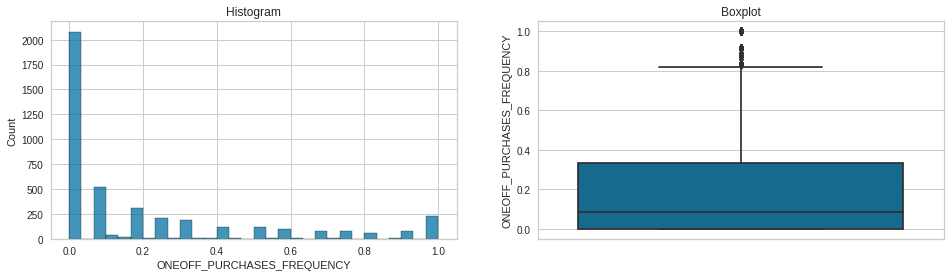

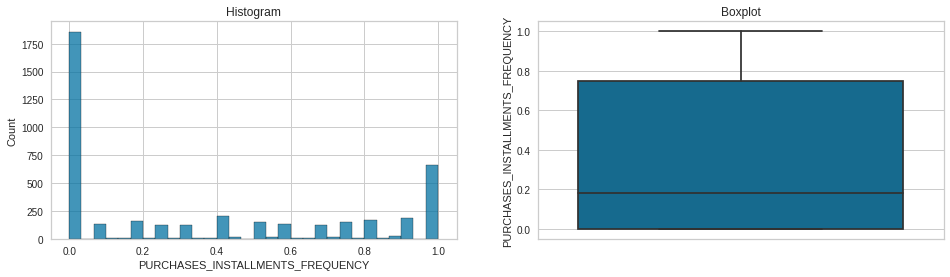

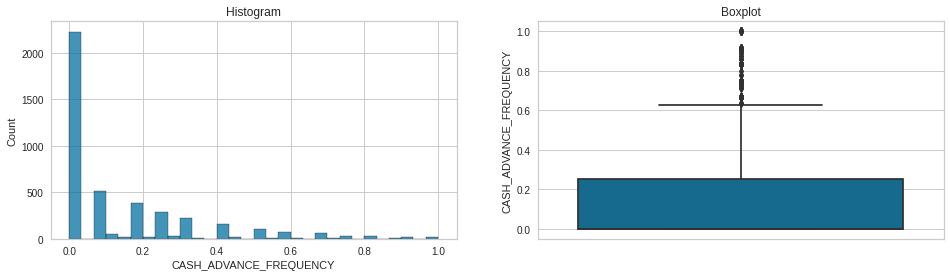

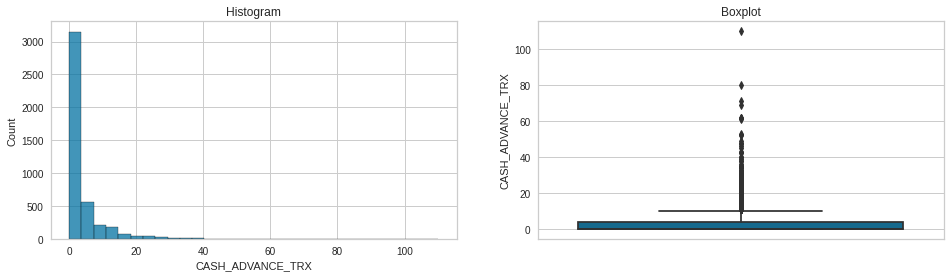

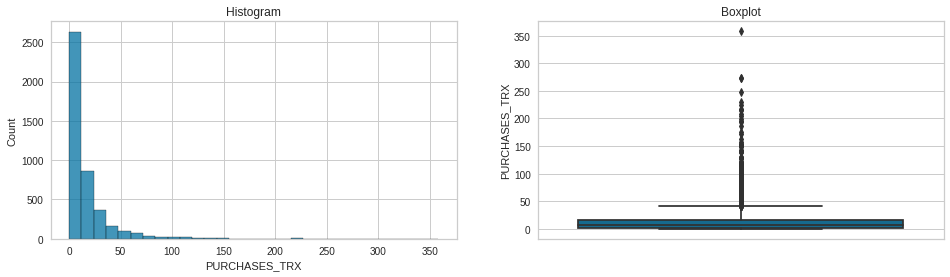

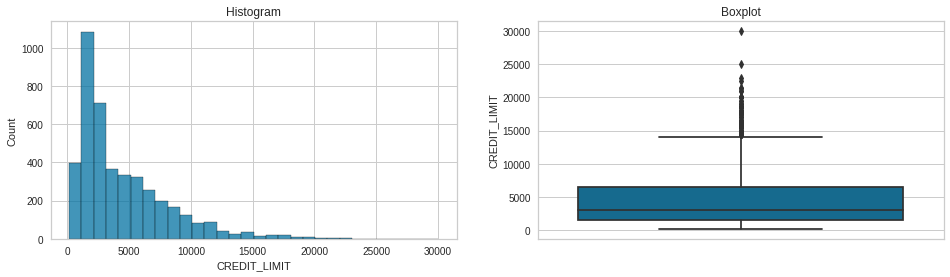

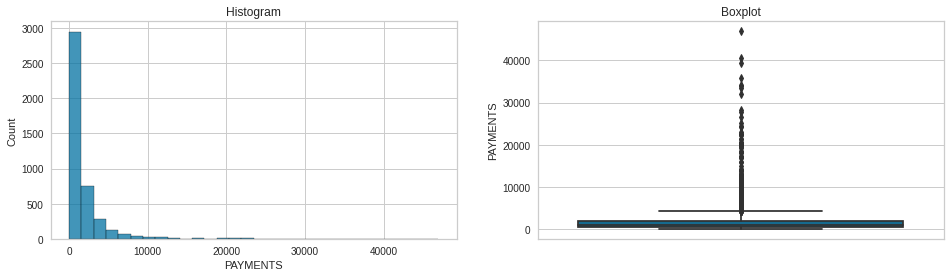

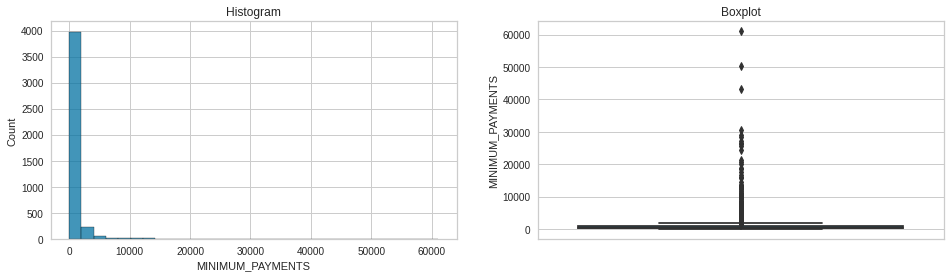

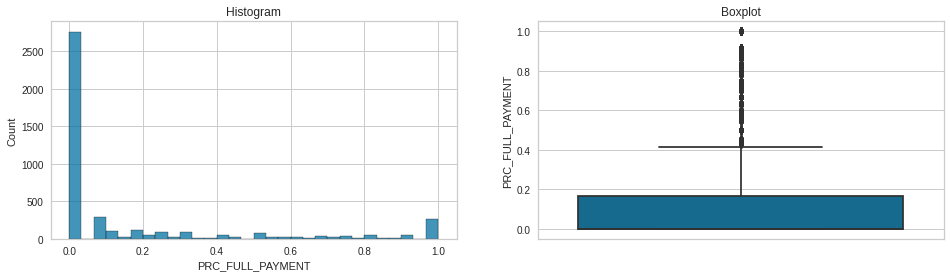

In [255]:
diagnostic_plots(num, 'BALANCE')
diagnostic_plots(num, 'BALANCE_FREQUENCY')
diagnostic_plots(num, 'PURCHASES')
diagnostic_plots(num, 'ONEOFF_PURCHASES')
diagnostic_plots(num, 'INSTALLMENTS_PURCHASES')
diagnostic_plots(num, 'CASH_ADVANCE')
diagnostic_plots(num, 'PURCHASES_FREQUENCY')
diagnostic_plots(num, 'ONEOFF_PURCHASES_FREQUENCY')
diagnostic_plots(num, 'PURCHASES_INSTALLMENTS_FREQUENCY')
diagnostic_plots(num, 'CASH_ADVANCE_FREQUENCY')
diagnostic_plots(num, 'CASH_ADVANCE_TRX')
diagnostic_plots(num, 'PURCHASES_TRX')
diagnostic_plots(num, 'CREDIT_LIMIT')
diagnostic_plots(num, 'PAYMENTS')
diagnostic_plots(num, 'MINIMUM_PAYMENTS')
diagnostic_plots(num, 'PRC_FULL_PAYMENT')


Untuk kolom 'BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT tidak akan dihandling outlier karena kolom kolom ini mempunyai range yaitu antara 0 sampai dengan 1. Dan nilainya sudah pasti. 

In [256]:
data_outlier = num.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT'], axis=1)
data_outlier.head(2)

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,101.682988,610.34,86.00,524.34,0.000000,0,40,1500.0,324.924223,152.877812
1,966.251742,311.45,311.45,0.00,955.959749,1,15,1500.0,277.522439,286.299328


In [257]:
for k in data_outlier:
  Q3 = data_outlier[k].quantile(.75)
  Q1 = data_outlier[k].quantile(.15)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = data_outlier[(data_outlier[k] > upper) | (data_outlier[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/data_outlier.shape[0] * 100, '%')
  print('='*70)

BALANCE
count of outlier:  80
percent k of outlier:  1.855717930874507 %
PURCHASES
count of outlier:  160
percent k of outlier:  3.711435861749014 %
ONEOFF_PURCHASES
count of outlier:  257
percent k of outlier:  5.961493852934354 %
INSTALLMENTS_PURCHASES
count of outlier:  175
percent k of outlier:  4.059382973787985 %
CASH_ADVANCE
count of outlier:  238
percent k of outlier:  5.520760844351658 %
CASH_ADVANCE_TRX
count of outlier:  177
percent k of outlier:  4.105775922059847 %
PURCHASES_TRX
count of outlier:  150
percent k of outlier:  3.479471120389701 %
CREDIT_LIMIT
count of outlier:  4
percent k of outlier:  0.09278589654372535 %
PAYMENTS
count of outlier:  170
percent k of outlier:  3.9434006031083277 %
MINIMUM_PAYMENTS
count of outlier:  189
percent k of outlier:  4.3841336116910234 %


Akan dilakukan handling outlier dengan menggunakan capping metode IQR dengan fold 3 karena distribusi nya lebih banyak distribusi tidak normal dengan nilai skew yang diatas 1. 

In [258]:
for col in data_outlier.columns:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3,variables=[col])
    winsorizer.fit(data_pro)
    data_capping = winsorizer.transform(data_pro)

Membandingkan nilai central tendency sebelum dan sesudah dilakukan capping

In [259]:
# Compare before and after outlier handling
print('before handling: \n', data_pro.describe())


before handling: 
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4311.000000        4311.000000   4311.000000       4311.000000   
mean    1598.581930           0.895114   1026.069478        601.456637   
std     2107.789065           0.206819   2242.837879       1690.965469   
min        0.000000           0.000000      0.000000          0.000000   
25%      152.508443           0.909091     45.000000          0.000000   
50%      916.487817           1.000000    380.000000         36.000000   
75%     2103.472964           1.000000   1149.960000        600.000000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4311.000000   4311.000000          4311.000000   
mean               424.998578    985.414474             0.495806   
std                941.013007   2159.363831             0.399456   
min                  0.000000      0.00000

In [260]:
print('after handling: \n', data_capping.describe())

after handling: 
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4311.000000        4311.000000   4311.000000       4311.000000   
mean    1598.581930           0.895114   1026.069478        601.456637   
std     2107.789065           0.206819   2242.837879       1690.965469   
min        0.000000           0.000000      0.000000          0.000000   
25%      152.508443           0.909091     45.000000          0.000000   
50%      916.487817           1.000000    380.000000         36.000000   
75%     2103.472964           1.000000   1149.960000        600.000000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4311.000000   4311.000000          4311.000000   
mean               424.998578    985.414474             0.495806   
std                941.013007   2159.363831             0.399456   
min                  0.000000      0.000000

In [261]:
data_capping.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,101.682988,1.0,610.34,86.00,524.34,0.000000,1.000000,0.166667,1.0,0.000000,0,40,1500.0,324.924223,152.877812,0.090909,12
1,966.251742,1.0,311.45,311.45,0.00,955.959749,0.333333,0.333333,0.0,0.083333,1,15,1500.0,277.522439,286.299328,0.000000,12


In [262]:
data_capping.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Scaling

In [263]:
# numerical scaling

num_scaling = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(data_capping[num_scaling]))
num_scaled.columns = num_scaling

data_capping.drop(num_scaling, axis=1, inplace=True)
data_capping_scal = pd.concat([data_capping, num_scaled], axis=1)

data_capping_scal.head(2)

,TENURE,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,12,-0.710257,0.507198,-0.18538,-0.304865,0.105581,-0.456398,1.262348,-0.130293,1.583128,-0.680090,-0.493904,1.028887,-0.819767,-0.487617,-0.669321,-0.241094
1,12,-0.300032,0.507198,-0.31866,-0.171523,-0.451692,-0.013642,-0.406781,0.426523,-0.928934,-0.262793,-0.341806,0.007694,-0.819767,-0.503427,-0.484997,-0.544339


In [264]:
data_scal_num = data_capping_scal.drop(['TENURE'], axis=1)

### One Hot Encoding 

Dilakukan encoding untuk categoric data yaitu TENURE 

In [265]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(data_capping_scal[['TENURE']]))
cat_ohe.columns = ohe_enc.get_feature_names(['TENURE'])

review = pd.concat([data_capping_scal[['TENURE']].reset_index(drop=True), cat_ohe], axis=1)
review

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TENURE,TENURE_6,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
4306,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4307,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4308,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4309,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Combine NUmerical dan Categorical 

In [266]:
data_eda = pd.concat([data_capping_scal.reset_index(drop=True), cat_ohe], axis=1)
data_eda.head()

,TENURE,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE_6,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,12,-0.710257,0.507198,-0.185380,-0.304865,0.105581,-0.456398,1.262348,-0.130293,1.583128,...,-0.487617,-0.669321,-0.241094,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12,-0.300032,0.507198,-0.318660,-0.171523,-0.451692,-0.013642,-0.406781,0.426523,-0.928934,...,-0.503427,-0.484997,-0.544339,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12,0.335991,-0.811633,5.243270,6.295722,1.183374,-0.367633,0.427785,1.540163,-0.091581,...,3.974985,0.929664,-0.544339,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7,0.480109,0.507198,-0.229009,-0.355730,0.092997,0.827394,1.262348,-0.687113,1.224262,...,-0.365321,0.144541,-0.544339,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,12,0.120550,0.507198,0.701840,0.945453,-0.026569,1.155900,-0.406781,-0.130293,-0.719596,...,-0.141583,0.124431,-0.210769,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [267]:
data_eda_new= data_eda.drop(['TENURE'],axis=1)

In [268]:
data_eda_new.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE_6,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,-0.710257,0.507198,-0.18538,-0.304865,0.105581,-0.456398,1.262348,-0.130293,1.583128,-0.680090,...,-0.487617,-0.669321,-0.241094,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.300032,0.507198,-0.31866,-0.171523,-0.451692,-0.013642,-0.406781,0.426523,-0.928934,-0.262793,...,-0.503427,-0.484997,-0.544339,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### VIF

Mencari nilai VIF untuk melihat multicolinarity antar kolom

In [269]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_scal_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_scal_num.values, i) for i in range(len(data_scal_num.columns))]

vif_data

,feature,VIF
0,BALANCE,4.348897
1,BALANCE_FREQUENCY,1.312629
2,PURCHASES,52594.241938
3,ONEOFF_PURCHASES,29896.669615
4,INSTALLMENTS_PURCHASES,9261.940027
5,CASH_ADVANCE,2.888076
6,PURCHASES_FREQUENCY,10.562710
7,ONEOFF_PURCHASES_FREQUENCY,3.960866
8,PURCHASES_INSTALLMENTS_FREQUENCY,9.469876
9,CASH_ADVANCE_FREQUENCY,3.602697


Nilai VIF diatas treshold 5 ada 5 kolom, artinya terdapat 5 kolom yang multicolenarity nya tinggi . 

### PRINCIPLE COMPONENT ANALYSIS (PCA)

Melakukan PCA untuk mereduksi dimensi 

In [270]:
pca=PCA(n_components=16)
pca.fit(data_eda_new)

PCA(n_components=16)

In [271]:
pca.explained_variance_ratio_

array([0.28677089, 0.22931835, 0.09699896, 0.0758669 , 0.06221877,
       0.05440583, 0.03842414, 0.03403159, 0.03173431, 0.02230248,
       0.01716453, 0.0131412 , 0.01126914, 0.0086368 , 0.00763969,
       0.00280561])

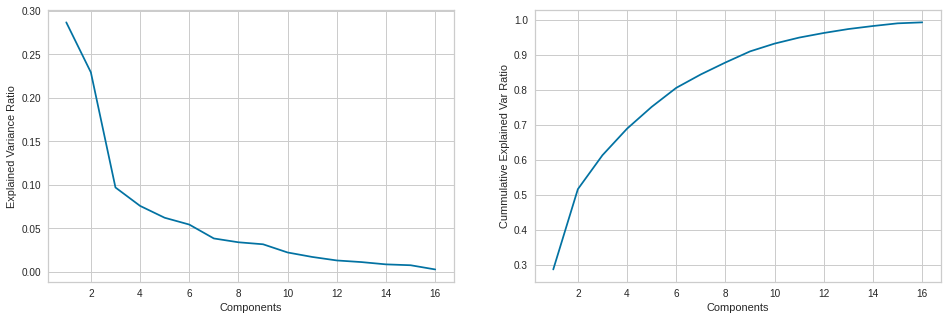

In [272]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17),pca.explained_variance_ratio_)
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,17),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

Dari hasil PCA didapatkan bahwa kita mengambil PCA senilai 8 karena pada saat titik ini pengurangan informasi sudah semakin landai / berkurang. Jadi akan diambil nilai 8 untuk reduksi dimensinya. PCA digunakan untuk mereduksi dimensi data dengan mangambil informasi menggunakan treshold yang ditentukan. pada data ini jumlah pca yang digunakan sebanyak 8 dengan informasi yang dipertahankan sebanyak 89%.

In [273]:
pca=PCA(n_components=8)
pcascal=pca.fit_transform(data_eda_new)
pcascal

array([[ 7.23413110e-01, -1.91674643e+00, -1.55335798e+00, ...,
         4.90464909e-01, -3.42641491e-01,  6.66655697e-01],
       [-9.45955877e-01, -4.34420099e-01, -2.79027965e-03, ...,
         8.44175493e-02,  1.52404892e-01,  2.91779520e-01],
       [ 7.36201517e+00,  1.29570666e+00,  4.27218837e+00, ...,
         2.36790996e+00, -1.13653266e-01,  1.21835190e+00],
       ...,
       [-9.88889378e-01,  1.34274204e+00, -2.08257716e-01, ...,
        -7.98812426e-01,  6.25732473e-01, -4.33845849e-01],
       [ 6.44979410e-01, -1.59413714e+00, -9.25942567e-01, ...,
         6.73832871e-01,  3.71202915e-01,  3.06084190e-01],
       [-1.84880991e+00, -4.40865212e-01,  1.83895377e-01, ...,
         7.09371534e-01,  4.42167057e-01, -4.68260629e-02]])

In [274]:
data_pca_new = pd.DataFrame(pcascal)
data_pca_new

,0,1,2,3,4,5,6,7
0,0.723413,-1.916746,-1.553358,0.707965,-0.323109,0.490465,-0.342641,0.666656
1,-0.945956,-0.434420,-0.002790,-0.792247,-1.048775,0.084418,0.152405,0.291780
2,7.362015,1.295707,4.272188,-2.374725,-1.030906,2.367910,-0.113653,1.218352
3,0.076719,0.317922,-1.671298,1.056857,0.231119,0.422942,-0.229060,0.766186
4,0.154850,1.188045,0.691160,-0.331351,-0.366911,0.136775,0.544916,0.241129
...,...,...,...,...,...,...,...,...
4306,-0.828880,0.864107,3.526722,0.718596,2.705641,0.040827,-0.241086,1.406959
4307,-2.036864,-0.381131,0.928227,0.130399,-0.539552,0.450315,0.306398,-0.707763
4308,-0.988889,1.342742,-0.208258,-1.725931,1.125558,-0.798812,0.625732,-0.433846
4309,0.644979,-1.594137,-0.925943,0.767522,0.532623,0.673833,0.371203,0.306084


## Model Definition


###Kmeans

Percobaan KMeans Manual 

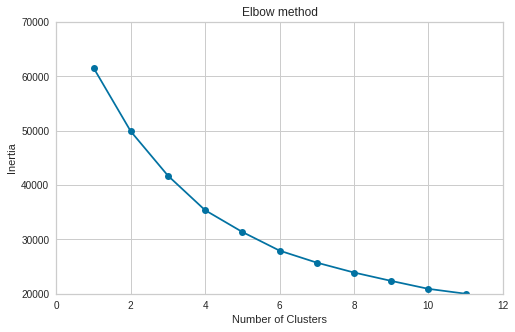

In [275]:
kmeans_models = [KMeans(n_clusters=k, max_iter=500, random_state=42).fit(pcascal) for k in range (1, 12)]
inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), inertia, 'bo-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axis([0, 12, 20000, 70000]);

Dpdapatkan titik patah dari Elbow Method titik optimal nya di titik 4. Karena data mulai landai di saat itu . 

Percobaan KMeans dengan KElbowVisualizer:

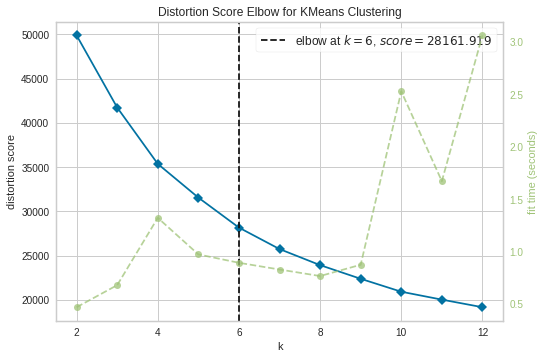

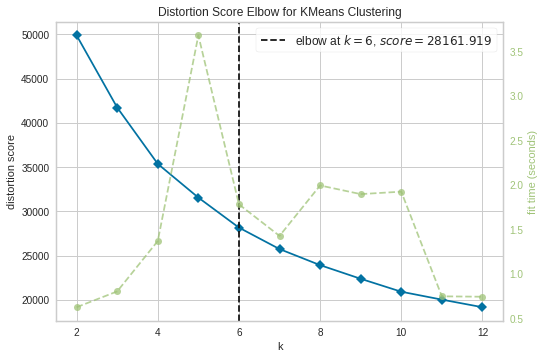

In [276]:
# defining models
km1_model = KMeans(algorithm='full',random_state=20)
km2_model = KMeans(algorithm='elkan',random_state=20)
# Showing elbow point
Elbow_M = KElbowVisualizer(km1_model, k=12)
Elbow_M.fit(data_pca_new)
Elbow_M.show()

Elbow_M = KElbowVisualizer(km2_model, k=12)
Elbow_M.fit(data_pca_new)
Elbow_M.show()

Kmeans dengan menggunakan kedua model tadi menunjukan best result nya 6 cluster, mari kita lihat pada sihlouette score. 



Silhouette model 1

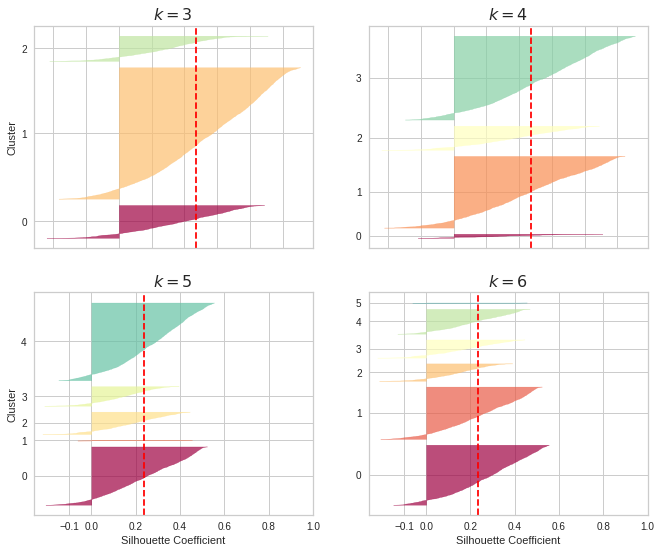

In [277]:
# plotting silhouette
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_pca_new)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(data_pca_new, km1_model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_pca_new, km1_model.labels_)

    padding = len(data_pca_new) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Solhouette model 2

In [278]:
silhouette_scores = [silhouette_score(data_pca_new, km2_model.labels_)
                     for model in kmeans_per_k[1:]]

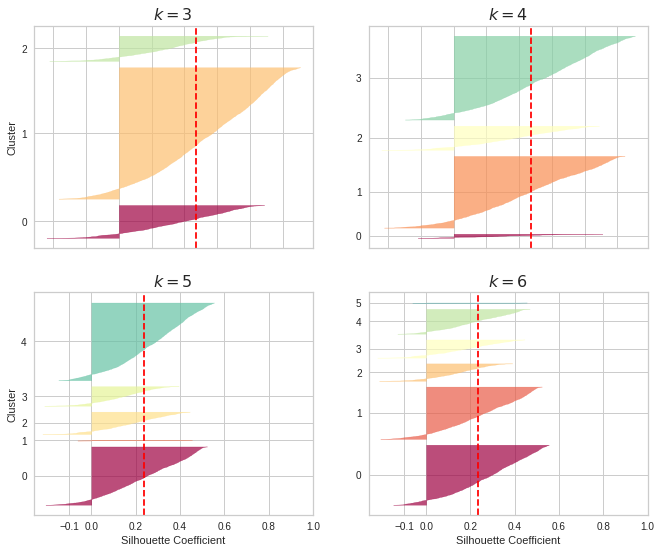

In [279]:
# plotting silhouette
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_pca_new, km2_model.labels_)

    padding = len(data_pca_new) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Jika dilihat dari visualisasi silhouette nya , dengan cluster jumlah 6 pembagian cluster masih kurang optimal.
Kita akan coba visualisasikan ke dalam scatterplot .

Kmeans dengan cluster 6 

In [280]:
kmeans = KMeans(n_clusters=6, max_iter=500, random_state=42)
kmeans.fit(data_pca_new)

KMeans(max_iter=500, n_clusters=6, random_state=42)

In [281]:
kmeans.labels_

array([1, 0, 2, ..., 0, 1, 0], dtype=int32)

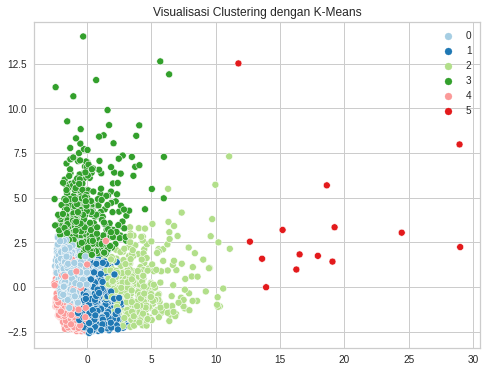

In [282]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pcascal[:,0], y=pcascal[:,1], hue=kmeans.labels_, palette='Paired')
ax.set_title('Visualisasi Clustering dengan K-Means');

masih banyak cluster yang tercampur dengan cluster lain/ tumpang susun, mari kita coba mengurangi cluster nya.

In [283]:
kmeans2 = KMeans(n_clusters=4, max_iter=500, random_state=42)
kmeans2.fit(data_pca_new)

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [284]:
kmeans2.labels_

array([1, 3, 0, ..., 3, 1, 3], dtype=int32)

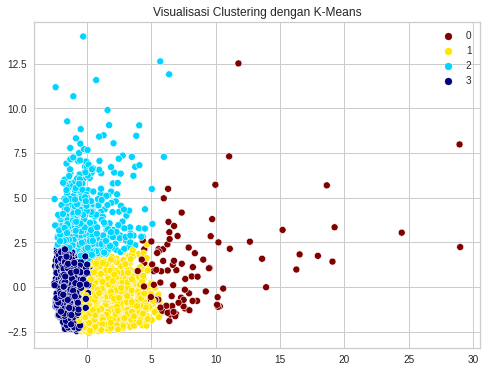

In [285]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pcascal[:,0], y=pcascal[:,1], hue=kmeans2.labels_, palette='jet_r')
ax.set_title('Visualisasi Clustering dengan K-Means');

Model Kmeans menunjukkan bahwa semua siluet pada nilai 3-6 k menunjukkan hasil yang kurang ideal untuk kedua model, dan karenanya, lebih cocok menggunakan cluster 4 karena data tersebar cukup merata dan akan dipertahankan. 

###DBSCAN

In [286]:
# Defining plot function
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

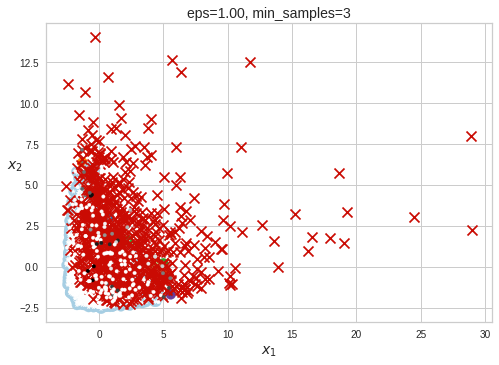

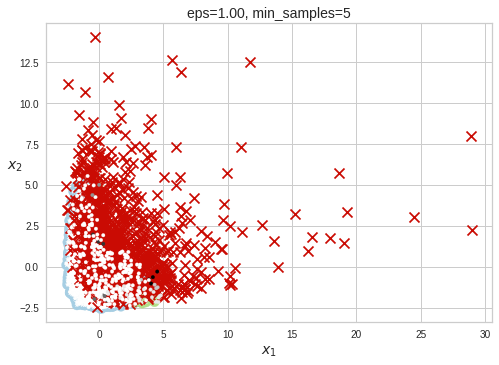

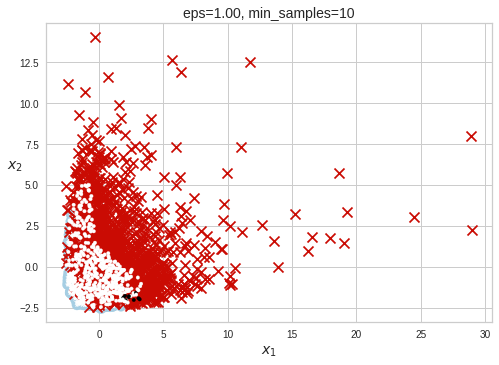

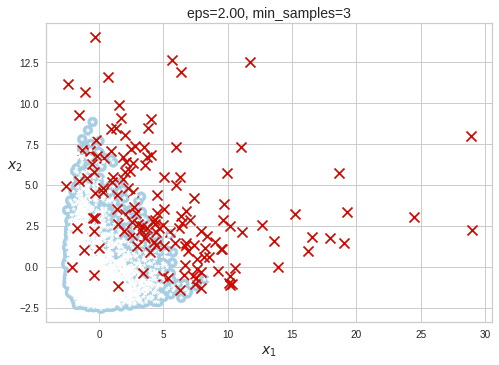

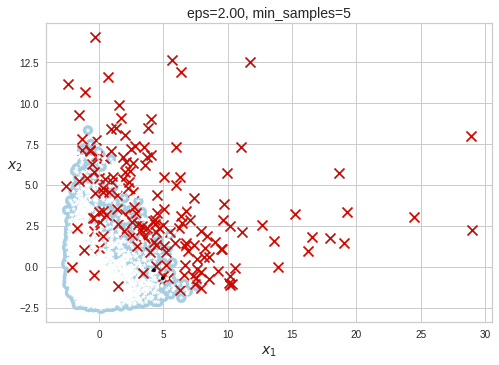

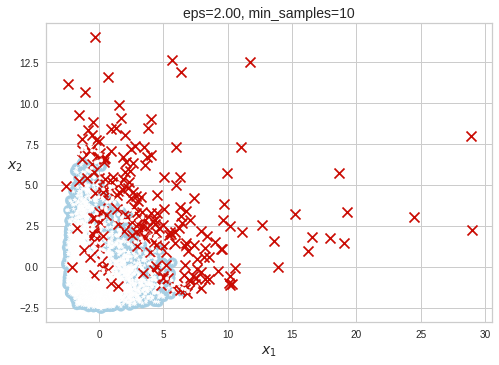

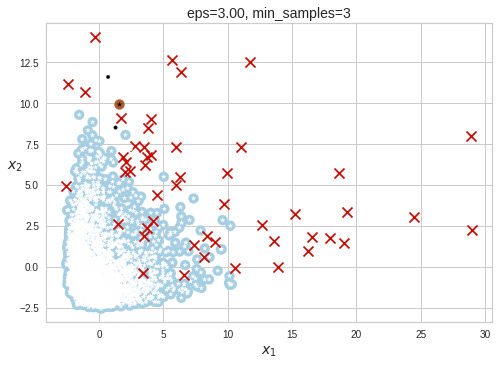

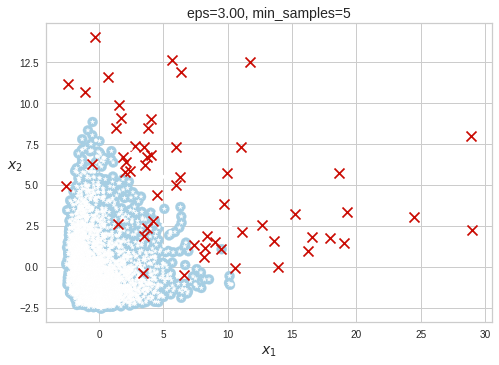

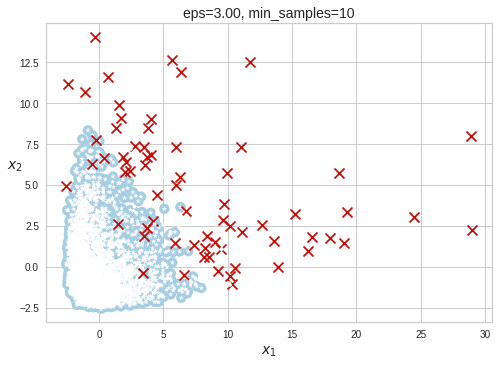

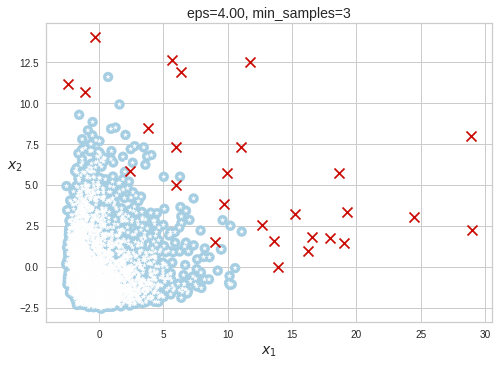

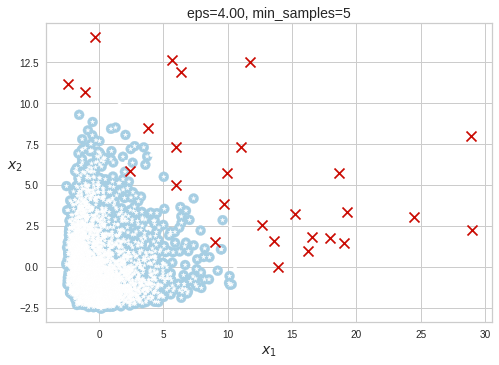

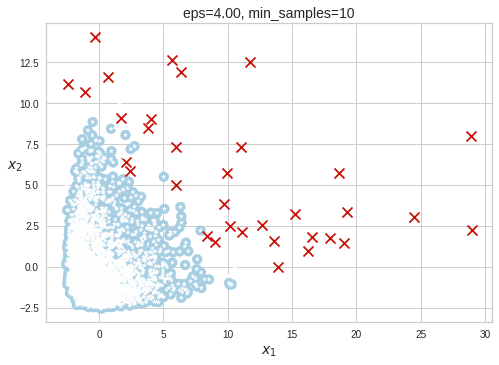

In [287]:
for e in [1,2,3,4]:
    for m in [3,5,10]:
        db_model = DBSCAN(eps=e, min_samples=m)
        db_model.fit(pcascal)
        plot_dbscan(db_model, pcascal, size=100)
        plt.show()

berdasarkan visualisasi model, diketahui bahwa clustering dengan metode DBscan tidak ideal untuk pemodelan ini. hal ini disebabkan penyebaran data yang berdekatan yang mengakibatkan clustering hanya menghasilkan 1 cluster saja, jadi model kurang bisa diterima. 

### AGGLOMERATIVE CLUSTERING

In [288]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg.fit(pcascal)

AgglomerativeClustering(n_clusters=4)

In [289]:
agg.labels_

array([3, 1, 0, ..., 1, 3, 1])

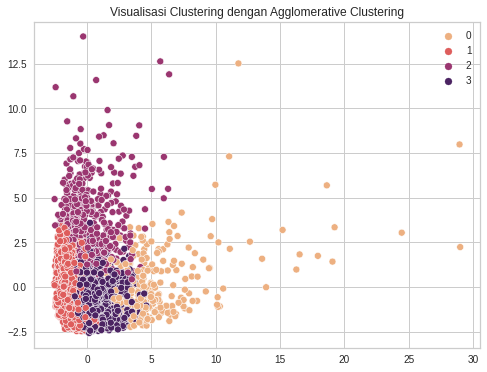

In [290]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pcascal[:,0], y=pcascal[:,1], hue=agg.labels_, palette='flare')
ax.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

- Model Algomerative menggunakan jumlah kelas yang sama dengan clustering menggunakan k-means
- Dengan menggunakan Algomerative dengan cluster 4 didapatkan visualisi yang masih tumpang susun antar data

### Gaussian

In [291]:
# Training model with k Number of Clusters
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pcascal)
             for k in range(1, 11)]

In [292]:
# calculating BIC and AIC

bics = [model.bic(pcascal) for model in gms_per_k]
aics = [model.aic(pcascal) for model in gms_per_k]

for k in range(0, 10):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  108379.1653999851 	AIC :  108098.93269229622
Cluster :  2 	BIC :  90674.92171027679 	AIC :  90108.0873697243
Cluster :  3 	BIC :  73401.40625435837 	AIC :  72547.97028094226
Cluster :  4 	BIC :  66610.22254522973 	AIC :  65470.184938949984
Cluster :  5 	BIC :  60154.45675041978 	AIC :  58727.817511276415
Cluster :  6 	BIC :  55709.026746501244 	AIC :  53995.785874494264
Cluster :  7 	BIC :  52853.24932385896 	AIC :  50853.40681898836
Cluster :  8 	BIC :  50370.910831293724 	AIC :  48084.4666935595
Cluster :  9 	BIC :  48951.681181736625 	AIC :  46378.635411138785
Cluster :  10 	BIC :  47001.1686107648 	AIC :  44141.52120730333


In [293]:
# finding best parameter for the model
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(pcascal).bic(pcascal)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print('Best - n_components    : ', best_k)
print('Best - covariance_type : ', best_covariance_type)

Best - n_components    :  10
Best - covariance_type :  full


Dengan model ini didapatkan jumlah cluster nya 10, mari kita terapkan dan lihat visualisasinya

In [294]:
# defining best model
gm_model=GaussianMixture(n_components=10, n_init=10,covariance_type='full',random_state=42).fit(pcascal)


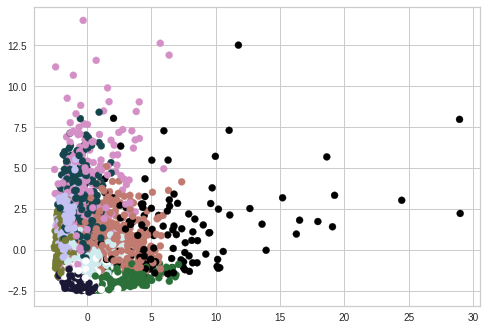

In [295]:
# plotting result
plt.scatter(pcascal[:,0],pcascal[:,1],c=gm_model.predict(pcascal),cmap='cubehelix_r')
plt.show()

Data sangat tumpang susun dan tidak teratur. mair kita buat menjadi 4 cluster. 

In [296]:
# defining best model
gm_model2=GaussianMixture(n_components=4, n_init=10,covariance_type='full',random_state=42).fit(pcascal)

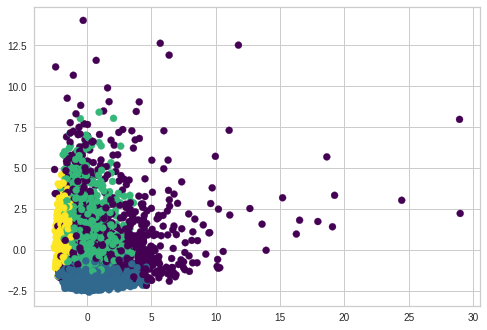

In [297]:
# plotting result
plt.scatter(pcascal[:,0],pcascal[:,1],c=gm_model2.predict(pcascal),cmap='viridis')
plt.show()

Gaussian model:
- tuning hyper-parameter dilakukan untuk melihat parameter mana yang terbaik
- melakukan clustering menggunakan parameter terbaik namun dengan jumlah klaster mengikuti klaster yang digunakan oleh kmeans yaitu 10
- dengan cluster 10 tidak menunjukan hasil yang lebih baik dibandingkan dengan penggunakan jumlah 4  
- Dengan model ini masih ada juga data yang tumpang susun. 
- hasil dari pemodelan menunjukkan cluster dikelompokkan secara tidak konsisten dengan cluster yang lebih kecil tersebar.


#### Predict dengan Best Model 

Pemilihan algoritma terbaik untuk clustering yaitu k-means dengan pertimbangan melihat sedikitnya data yang tumpang susun antar cluster dan batasan yang terbentuk

In [298]:
# Redefining KMeans model
km1_model_new = KMeans(algorithm='full',n_clusters=4,random_state=32)
km1_model_new.fit(pcascal)

KMeans(algorithm='full', n_clusters=4, random_state=32)

In [299]:
# defining prediction data
y_pred=km1_model_new.labels_
y_pred_df=pd.DataFrame(y_pred)
y_pred_df=y_pred_df.reset_index(drop=True)

dfa=pd.concat([data_pro,y_pred_df],axis=1)
dfa.rename({0:'category'},axis=1,inplace=True)
dfa

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,category
0,101.682988,1.000000,610.34,86.00,524.34,0.000000,1.000000,0.166667,1.000000,0.000000,0,40,1500.0,324.924223,152.877812,0.090909,12,1
1,966.251742,1.000000,311.45,311.45,0.00,955.959749,0.333333,0.333333,0.000000,0.083333,1,15,1500.0,277.522439,286.299328,0.000000,12,0
2,2306.698723,0.727273,12784.51,11246.07,1538.44,191.652876,0.666667,0.666667,0.333333,0.083333,1,68,6200.0,13705.004410,1310.291574,0.000000,12,3
3,2610.433432,1.000000,512.50,0.00,512.50,2771.850961,1.000000,0.000000,0.857143,0.142857,6,11,3000.0,691.600531,741.985756,0.000000,7,1
4,1852.646433,1.000000,2600.00,2200.00,400.00,3481.132679,0.333333,0.166667,0.083333,0.083333,8,4,6000.0,1362.425769,727.429491,0.100000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,83.477053,0.181818,0.00,0.00,0.00,2654.856157,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,12902.188130,1791.729021,0.500000,12,0
4307,8.404256,0.857143,0.00,0.00,0.00,132.266653,0.000000,0.000000,0.000000,0.285714,3,0,2500.0,206.851966,24.421074,0.250000,7,0
4308,4211.539631,1.000000,0.00,0.00,0.00,455.581546,0.000000,0.000000,0.000000,0.083333,1,0,10500.0,1288.287239,1164.178674,0.000000,12,0
4309,111.539712,1.000000,1364.86,0.00,1364.86,0.000000,0.916667,0.000000,0.833333,0.000000,0,11,4000.0,1500.447193,150.868096,0.200000,12,1


In [300]:
dfa.category.value_counts()

0    1951
1    1678
2     564
3     118
Name: category, dtype: int64

Mari kita lihat visualisasi dari hasil clustering 

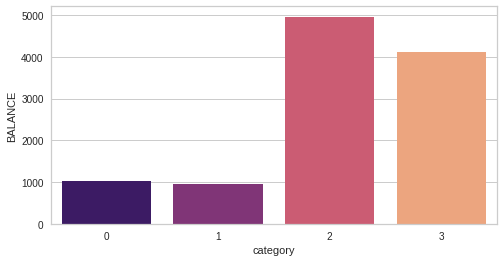

In [301]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=dfa, x='category', y='BALANCE', palette='magma', ci=None)


Visualisasi menunjukkan hubungan antar cluster dengan Balance
- Cluster 0 : customer yang Balance nya sedikit
- Cluster 1 : customer yang Balance nya paling sedikit
- Cluster 2 : customer yang Balance nya paling tinggi
- Cluster 3 : customer yang Balance nya lumayan tinggi

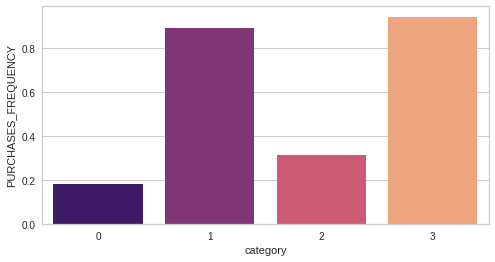

In [302]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=dfa, x='category', y='PURCHASES_FREQUENCY', palette='magma', ci=None)

Visualisasi menunjukkan hubungan antar cluster dengan PURCHASES_FREQUENCY
- Cluster 0 : customer yang pembelian nya paling sedikit
- Cluster 1 : customer yang pembelian nya lumayan tinggi
- Cluster 2 : customer yang pembelian nya sedikit
- Cluster 3 : customer yang pembelian nya paling tinggi

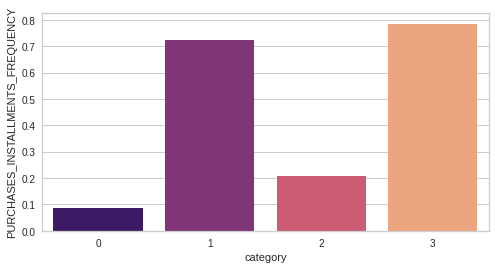

In [303]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=dfa, x='category', y='PURCHASES_INSTALLMENTS_FREQUENCY', palette='magma', ci=None)

Visualisasi menunjukkan hubungan antar cluster dengan PURCHASES_INSTALLMENTS_FREQUENCY
- Cluster 0 : customer yang cicilan nya paling sedikit
- Cluster 1 : customer yang cicilan nya lumayan tinggi
- Cluster 2 : customer yang cicilan nya sedikit
- Cluster 3 : customer yang cicilan nya paling tinggi

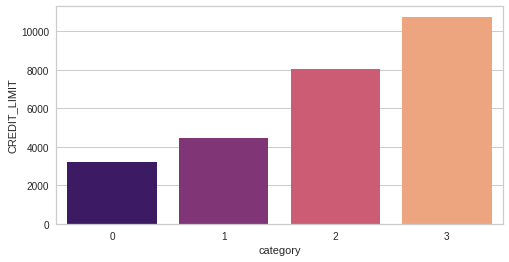

In [304]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=dfa, x='category', y='CREDIT_LIMIT', palette='magma', ci=None)

Visualisasi menunjukkan hubungan antar cluster dengan CREDIT_LIMIT
- Cluster 0 : customer yang limit credit nya paling sedikit
- Cluster 1 : customer yang limit credit nya sedikit
- Cluster 2 : customer yang limit credit nya lumayan tinggi
- Cluster 3 : customer yang limit credit nya paling tinggi

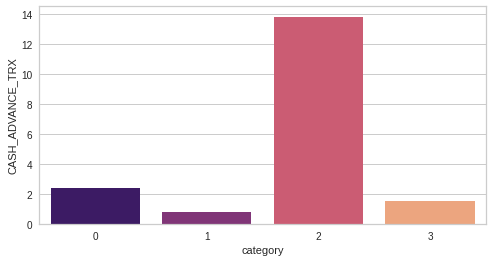

In [305]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=dfa, x='category', y='CASH_ADVANCE_TRX', palette='magma', ci=None)

Visualisasi menunjukkan hubungan antar cluster dengan CASH_ADVANCE
- Cluster 0 : customer yang cash advance nya lumayan tinggi
- Cluster 1 : customer yang cash advance nya paling sedikit
- Cluster 2 : customer yang cash advance nya paling tinggi
- Cluster 3 : customer yang cash advance nya sedikit

### Inference

In [306]:
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,83.004246,1.000000,726.89,482.51,244.38,0.0,0.833333,0.583333,0.666667,0.0,0,23,3000.0,666.292539,179.204296,0.166667,12
1,525.174170,1.000000,91.23,48.90,42.33,0.0,0.333333,0.083333,0.250000,0.0,0,4,4000.0,154.939835,233.341617,0.000000,12
2,736.736738,1.000000,1171.50,1003.54,167.96,0.0,0.750000,0.750000,0.333333,0.0,0,26,4000.0,2092.544158,200.597917,0.000000,12
3,1229.397644,1.000000,11414.48,6754.38,4660.10,0.0,1.000000,0.916667,1.000000,0.0,0,176,9000.0,9686.614183,263.250811,0.916667,12
4,26.621291,0.363636,426.83,426.83,0.00,0.0,0.416667,0.416667,0.000000,0.0,0,5,6000.0,195.490843,88.384521,0.000000,12


In [307]:
inf = winsorizer.transform(df_inf)
inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,83.004246,1.000000,726.89,482.51,244.38,0.0,0.833333,0.583333,0.666667,0.0,0,23,3000.0,666.292539,179.204296,0.166667,12
1,525.174170,1.000000,91.23,48.90,42.33,0.0,0.333333,0.083333,0.250000,0.0,0,4,4000.0,154.939835,233.341617,0.000000,12
2,736.736738,1.000000,1171.50,1003.54,167.96,0.0,0.750000,0.750000,0.333333,0.0,0,26,4000.0,2092.544158,200.597917,0.000000,12
3,1229.397644,1.000000,11414.48,6754.38,4660.10,0.0,1.000000,0.916667,1.000000,0.0,0,176,9000.0,9686.614183,263.250811,0.916667,12
4,26.621291,0.363636,426.83,426.83,0.00,0.0,0.416667,0.416667,0.000000,0.0,0,5,6000.0,195.490843,88.384521,0.000000,12


In [308]:
# numerical scaling

num_colm = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

num_scaled_inf = pd.DataFrame(scaler.transform(inf[num_colm]))
num_scaled_inf.columns = num_colm

inf.drop(num_colm, axis=1, inplace=True)
inf = pd.concat([inf, num_scaled_inf], axis=1)
inf = inf[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']]

inf.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.719120,0.507198,-0.133409,-0.070351,-0.191963,-0.456398,0.845065,1.261752,0.745775,-0.68009,-0.493904,0.334476,-0.413283,-0.373762,-0.632951,0.011611,12
1,-0.509317,0.507198,-0.416859,-0.326808,-0.406703,-0.456398,-0.406781,-0.408705,-0.300919,-0.68009,-0.493904,-0.441631,-0.142293,-0.544311,-0.558159,-0.544339,12


In [309]:
cat_ohe2 = pd.DataFrame(ohe_enc.transform(inf[['TENURE']]))
cat_ohe2.columns = ohe_enc.get_feature_names(['TENURE'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [310]:
inff = pd.concat([inf.reset_index(drop=True), cat_ohe2], axis=1)
inff.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TENURE_6,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,-0.719120,0.507198,-0.133409,-0.070351,-0.191963,-0.456398,0.845065,1.261752,0.745775,-0.68009,...,-0.632951,0.011611,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.509317,0.507198,-0.416859,-0.326808,-0.406703,-0.456398,-0.406781,-0.408705,-0.300919,-0.68009,...,-0.558159,-0.544339,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.408933,0.507198,0.064850,0.237811,-0.273183,-0.456398,0.636425,1.818572,-0.091581,-0.68009,...,-0.603395,-0.544339,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.175173,0.507198,4.632352,3.639126,4.501099,-0.456398,1.262348,2.375391,1.583128,-0.68009,...,-0.516839,2.513383,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.745873,-2.570078,-0.267210,-0.103282,-0.451692,-0.456398,-0.198139,0.704935,-0.928934,-0.68009,...,-0.758420,-0.544339,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [311]:
pcainf = inff.drop(['TENURE'], axis=1)

In [312]:
pca2=pca.transform(pcainf)
pca2

array([[ 0.66064206, -1.61224828, -0.73919312,  0.05907769, -1.0200248 ,
        -0.57233726, -0.13027196,  0.50847756],
       [-1.11175805, -0.8892244 , -0.28366106, -0.71373881, -0.17783472,
         0.10413992,  0.36730312,  0.31361509],
       [ 0.89991464, -1.00514302, -0.19946147, -0.78460654, -1.39770616,
        -0.74948813, -0.31781581,  0.71522797],
       [10.18581068, -1.11328828,  2.19535624,  0.58036242, -0.54788257,
         1.58037621, -0.058391  , -1.59343078],
       [-1.01153628, -1.30072911,  1.65614447, -0.79649076,  0.34648856,
        -0.91451858, -1.95870244,  0.11581293]])

In [313]:
# Predicting clusters
y_pred_inf=km1_model_new.predict(pca2)
y_pred_inf

array([1, 0, 1, 3, 0], dtype=int32)

In [314]:
# changing prediction into dataframe
y_pred_inf_df=pd.DataFrame(y_pred_inf,columns=['category'])
# joining prediction with inferential data
df_inf_pred=pd.concat([df_inf,y_pred_inf_df],axis=1)
df_inf_pred

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,category
0,83.004246,1.000000,726.89,482.51,244.38,0.0,0.833333,0.583333,0.666667,0.0,0,23,3000.0,666.292539,179.204296,0.166667,12,1
1,525.174170,1.000000,91.23,48.90,42.33,0.0,0.333333,0.083333,0.250000,0.0,0,4,4000.0,154.939835,233.341617,0.000000,12,0
2,736.736738,1.000000,1171.50,1003.54,167.96,0.0,0.750000,0.750000,0.333333,0.0,0,26,4000.0,2092.544158,200.597917,0.000000,12,1
3,1229.397644,1.000000,11414.48,6754.38,4660.10,0.0,1.000000,0.916667,1.000000,0.0,0,176,9000.0,9686.614183,263.250811,0.916667,12,3
4,26.621291,0.363636,426.83,426.83,0.00,0.0,0.416667,0.416667,0.000000,0.0,0,5,6000.0,195.490843,88.384521,0.000000,12,0


Hasil inference menunjukkan bahwa model bekerja dalam clustering data kartu kredit ini

## Kesimpulan 

- Model Clustering dapat dijalankan pada analisis data kartu kredit ini.
- PCA yang digunakan sebanyak 8, dengan informasi sebesar 89% 
- Clustering menggunakan metode Kmeans menunjukkan kinerja terbaik di antara model yang dilatih dalam analisis ini
- Nilai yg dihasilkan dari visualisasi elbow method dan silhout dijadikan acuan untuk mencoba jumlah cluster-cluster lain yang menurut kami bagus. 
- Hasil perhitungan best cluster dengan model KMeans menunjukan 4 cluster, karena data tersebar cukup merata  juga data tidak terlalu tumpang susun
- Perbaikan di masa mendatang dapat dilakukan dengan mencoba metode clustering lainnya, menormalkan data lebih lanjut, atau mengubah parameter PCA.







## Conceptual Problems 

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Jawab : 

1. Inersia menjelaskan jumlah jarak akar kuadrat dari pusat cluster ke titik data. Inersia berkurang dengan bertambahnya jumlah cluster. mencari jumlah cluster optimal biasanya dilakukan dengan mencari titik di mana penurunan inersia melambat. Singkatnya semakin kecil jarak, maka semakin baik cluster yang terbentuk.

2. Metode Elbow digunakan untuk menghitung jumlah cluster optimal berdasarkan inersia model. dilakukan dengan memplot grafik jumlah cluster dan inersia dan memilih titik di mana penurunan inersia melambat (titik siku).  Kelemahannya, pemilihan jumlah kelas subjektif menurut pembuat model, tidak ditentukannya nilai absolut untuk jumlah clustering.

3. Jawab:
- GMM membutuhkan definisi jumlah cluster agar model dapat bekerja. bekerja mirip dengan KMeans tetapi mengasumsikan bahwa distribusi data adalah gaussian dan menciptakan kluster bola bola atau bola terentang.
- DBscan dapat menemukan jumlah klasternya sendiri.DBscan mengelompokkan data berdasarkan jumlah data yang berdekatan (sampel minimum) pada jarak tertentu (epsilon). 
- Agglomerative: pengelompokan menggunakan tingkatan pada data, dapat digambarkan berbentuk piramida. awal data terbentuk satu cluster dan selanjutnya terpecah-pecah menjadi cluster-cluster lainnya. Pemisahan berdasarkan jarak antar datanya
- Kmeans bekerja dengan menempatkan k jumlah centroid dalam distribusi data dan clustering berdasarkan jarak titik data dari centroid tersebut.